## Initial Mental Health Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

# set directory
DIR = '~/Documents/Flatiron/Project_3/data'
PROJECT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

# function for saving figures 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data
df = pd.read_csv(DIR + '/survey_2014_data.csv') # original survey data to get full questions for data dict
df2 = pd.read_csv(DIR + '/archive.zip') # data uploaded to kaggle with new column headers

In [3]:
df.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Data dictionary for study

In [4]:
df2.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
data_dict = pd.DataFrame(df.columns)

In [6]:
data_dict.head()

,0
0,Timestamp
1,Age
2,Gender
3,Country
4,"If you live in the United States, which state ..."


In [7]:
data_dict['Field_Name'] = df2.columns

In [8]:
data_dict.set_index('Field_Name', inplace=True)

In [9]:
# display full width of columns
pd.set_option('display.max_colwidth', -1)

#preview data dict
data_dict

,0
Field_Name,
Timestamp,Timestamp
Age,Age
Gender,Gender
Country,Country
state,"If you live in the United States, which state or territory do you live in?"
self_employed,Are you self-employed?
family_history,Do you have a family history of mental illness?
treatment,Have you sought treatment for a mental health condition?
work_interfere,"If you have a mental health condition, do you feel that it interferes with your work?"


In [10]:
data_dict.to_csv(DIR + '/data_dict.csv')

### Null Value Check

Check dataframe for NULL values

In [11]:
df2.isna().sum()

Timestamp                    0   
Age                          0   
Gender                       0   
Country                      0   
state                        515 
self_employed                18  
family_history               0   
treatment                    0   
work_interfere               264 
no_employees                 0   
remote_work                  0   
tech_company                 0   
benefits                     0   
care_options                 0   
wellness_program             0   
seek_help                    0   
anonymity                    0   
leave                        0   
mental_health_consequence    0   
phys_health_consequence      0   
coworkers                    0   
supervisor                   0   
mental_health_interview      0   
phys_health_interview        0   
mental_vs_physical           0   
obs_consequence              0   
comments                     1095
dtype: int64

Only three columns have NULL values:
- `state` 
    - check to see if they are from US, if not create other column and dummy out states
    - if they are from US, create a separate column for from US, state NA
- `self_employed`
    - will remove because our target is `mental_health_consequences`
- `work_interfere`
    - unsure

In [49]:
df2.groupby('Country').Country.value_counts()

Country                 Country               
Australia               Australia                 19 
Austria                 Austria                   2  
Belgium                 Belgium                   6  
Bosnia and Herzegovina  Bosnia and Herzegovina    1  
Brazil                  Brazil                    4  
Bulgaria                Bulgaria                  4  
Canada                  Canada                    61 
Colombia                Colombia                  2  
Costa Rica              Costa Rica                1  
Croatia                 Croatia                   1  
Czech Republic          Czech Republic            1  
Finland                 Finland                   3  
France                  France                    11 
Georgia                 Georgia                   1  
Germany                 Germany                   33 
Greece                  Greece                    2  
India                   India                     7  
Ireland                 Ireland    

In [13]:
df2['self_employed'].value_counts()

No     1095
Yes    146 
Name: self_employed, dtype: int64

In [21]:
# drop self employed rows equal to Yes
df2 = df2[df2['self_employed'] != 'Yes']

In [53]:
df2.isna().sum()

Timestamp                    0  
Age                          0  
Gender                       0  
Country                      0  
state                        424
self_employed                18 
family_history               0  
treatment                    0  
work_interfere               243
no_employees                 0  
remote_work                  0  
tech_company                 0  
benefits                     0  
care_options                 0  
wellness_program             0  
seek_help                    0  
anonymity                    0  
leave                        0  
mental_health_consequence    0  
phys_health_consequence      0  
coworkers                    0  
supervisor                   0  
mental_health_interview      0  
phys_health_interview        0  
mental_vs_physical           0  
obs_consequence              0  
comments                     973
dtype: int64

In [22]:
df2['work_interfere'].value_counts()

Sometimes    407
Never        189
Rarely       158
Often        116
Name: work_interfere, dtype: int64

### Target variable

Explore the target variable `mental_health_consequences`

Respondents answered _Yes_, _No_ or _Maybe_ if they felt discussing a mental helath issue with their employer could have negative consequens.

In [74]:
for col in df2.columns:
    print(df2[col].value_counts())

2014-08-27 17:33:52    2
2014-08-27 14:22:43    2
2014-08-28 16:58:33    2
2014-08-27 12:44:51    2
2014-08-27 12:43:28    2
                      ..
2014-08-27 12:52:46    1
2014-08-27 11:44:43    1
2014-08-28 20:12:08    1
2014-08-28 22:18:41    1
2014-08-27 11:30:22    1
Name: Timestamp, Length: 1103, dtype: int64
 29      80
 32      72
 27      67
 28      66
 26      64
 34      58
 25      58
 31      57
 33      57
 30      51
 35      49
 23      49
 24      41
 37      38
 38      36
 39      30
 36      28
 40      28
 43      23
 41      19
 42      18
 22      17
 21      15
 46      11
 45      11
 44      9 
 19      8 
 18      7 
 48      6 
 20      6 
 50      4 
 51      4 
 49      3 
 55      3 
 56      3 
 57      3 
 54      2 
 47      2 
 60      2 
-1726    1 
-29      1 
 53      1 
 58      1 
 62      1 
 72      1 
 329     1 
 5       1 
Name: Age, dtype: int64
Male                                              548
male                                   

In [13]:
# target variable value counts
df2['mental_health_consequence'].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

Saving figure mental_health_consequences


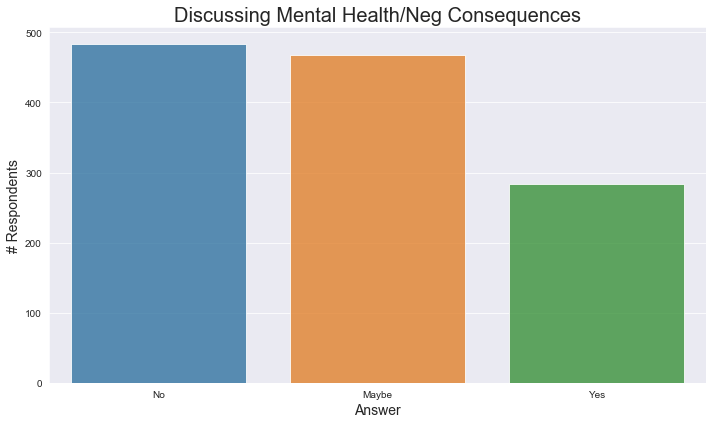

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df2['mental_health_consequence'], alpha = .80)
plt.title('Discussing Mental Health/Neg Consequences', fontdict={'fontsize':20})
plt.ylabel('# Respondents', fontdict={'fontsize':14})
plt.xlabel('Answer', fontdict={'fontsize':14})
save_fig('mental_health_consequences')

### Observations
- At first glance it seems that most people answered no, which means they don't believe that discussing mental health issues with their employer could lead to negative consequences.
- However, there is a significant amoutn of Maybe's which indicates respondents where unsure if it would or not
- for the case of this study, we will group the Yes and Maybe columns together to create a binary classification

In [102]:
# plot target vs benefits
mental_health_cons_val = df2['mental_health_consequence'].value_counts().to_frame() # create mental health df
mental_health_cons_val.sort_index(ascending=False, axis=0) # sort alhpabetically by index

,mental_health_consequence
Yes,261
No,418
Maybe,434


In [103]:
phys_health_cons_val = df2['phys_health_consequence'].value_counts().to_frame() # create benefits df
phys_health_cons_val.sort_index(ascending=False, axis=0) # sort alphabetically by index

,phys_health_consequence
Yes,49
No,822
Maybe,242


In [104]:
plot_frame = pd.DataFrame(
    data={'Answers': ["Yes", "No", "Maybe"], 
          'Mental': mental_health_cons_val['mental_health_consequence'],
          'Physcial': phys_health_cons_val['phys_health_consequence']}) # create df with dict combining both df
plot_frame

,Answers,Mental,Physcial
Maybe,Yes,434,242
No,No,418,822
Yes,Maybe,261,49


In [105]:
plot_frame = pd.melt(plot_frame, id_vars='Answers', var_name='Mental', value_name='Physical') # melt df
plot_frame

,Answers,Mental,Physical
0,Yes,Mental,434
1,No,Mental,418
2,Maybe,Mental,261
3,Yes,Physcial,242
4,No,Physcial,822
5,Maybe,Physcial,49


Saving figure mental_phys_neg_conseq


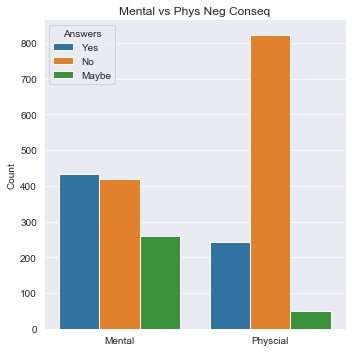

In [111]:
# plot the melted df
sns.catplot(x='Mental', y='Physical', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
.set(ylabel='Count', xlabel='', title='Mental vs Phys Neg Conseq')
save_fig('mental_phys_neg_conseq')

### Age

In [14]:
# changes format to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

In [15]:
df2.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


Some odd age numbers, will have to deal with outliers

In [37]:
# Function to find outliers in Age column
def outliers(df):
    '''Takes in a dataframe and returns a list of outliers > 99th and < 1 percentile'''
    outliers = []
    for i in df:
        q1 = np.percentile(df, .5)
        q3 = np.percentile(df, 99.5)
        if i > q3 or i < q1:
            outliers.append(i)
    print("Outliers:", outliers)
    return outliers

In [38]:
age_outliers = outliers(df2['Age'])

Outliers: [-29, 60, 329, 58, 62, -1726, 5, 72, 60]


In [18]:
df2 = df2.loc[~df2['Age'].isin(age_outliers)]

In [19]:
df2.describe()

,Age
count,1234.00
mean,31.92
std,6.77
min,19.00
25%,27.00
50%,31.00
75%,36.00
max,56.00


Saving figure age_hist_no_outliers


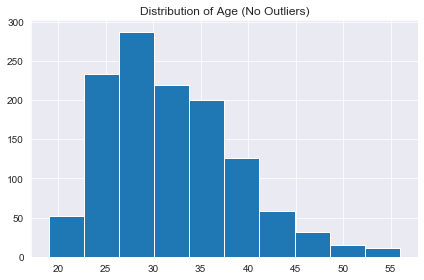

In [30]:
# plt histogram of age no outliers
plt.hist(df2['Age'])
plt.title('Distribution of Age (No Outliers)')
save_fig('age_hist_no_outliers')
plt.show()


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1234 non-null object
Age                          1234 non-null int64
Gender                       1234 non-null object
Country                      1234 non-null object
state                        726 non-null object
self_employed                1216 non-null object
family_history               1234 non-null object
treatment                    1234 non-null object
work_interfere               976 non-null object
no_employees                 1234 non-null object
remote_work                  1234 non-null object
tech_company                 1234 non-null object
benefits                     1234 non-null object
care_options                 1234 non-null object
wellness_program             1234 non-null object
seek_help                    1234 non-null object
anonymity                    1234 non-null object
leave                        1234 non-null obj

After removing outlier age columns 1234 columns left.

### Timestamp

In [22]:
# convert timestamp to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [23]:
# create columns for years, months, days, dow, hour to see when majority of surveys were administered
df2['Year'] = df2['Timestamp'].dt.year
df2['Month'] = df2['Timestamp'].dt.month
df2['Day'] = df2['Timestamp'].dt.day
df2['Dow'] = df2['Timestamp'].dt.dayofweek
df2['Hour'] = df2['Timestamp'].dt.hour

In [24]:
df2.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year,Month,Day,Dow,Hour
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Maybe,Yes,No,NaN,2014,8,27,2,11
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,Don't know,No,NaN,2014,8,27,2,11
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,No,No,NaN,2014,8,27,2,11
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Maybe,Maybe,No,Yes,NaN,2014,8,27,2,11
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Yes,Yes,Don't know,No,NaN,2014,8,27,2,11


In [ ]:
plt.plot()